# 信号处理仿真与应用 - 数字滤波
## 零相位数字滤波：filtfilt

**和MATLAB波形一致**

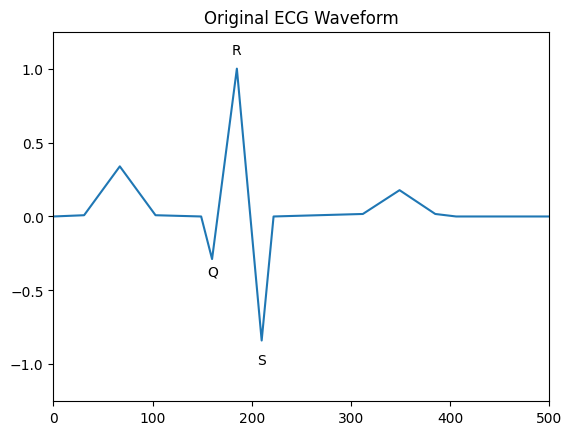

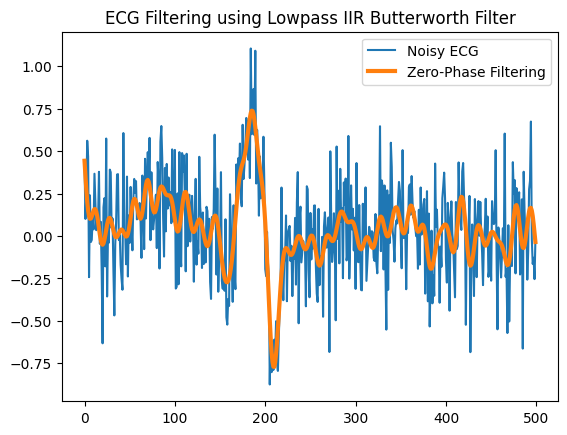

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import filtfilt, butter

# Define ECG signal generator function
def ecg(L):
    a0 = [0, 1, 40, 1, 0, -34, 118, -99, 0, 2, 21, 2, 0, 0, 0]
    d0 = [0, 27, 59, 91, 131, 141, 163, 185, 195, 275, 307, 339, 357, 390, 440]
    a = np.array(a0) / max(a0)
    d = np.round(np.array(d0) * L / d0[-1]).astype(int)
    d[-1] = L
    x = np.zeros(L)
    
    for i in range(14):
        m = np.arange(d[i], d[i+1])
        slope = (a[i+1] - a[i]) / (d[i+1] - d[i])
        x[m] = a[i] + slope * (m - d[i])
    
    return x

# Generate ECG waveform
wform = ecg(500)

plt.figure()
plt.plot(wform)
plt.axis([0, 500, -1.25, 1.25])
plt.text(155, -0.4, "Q")
plt.text(180, 1.1, "R")
plt.text(205, -1, "S")
plt.title("Original ECG Waveform")
plt.show()

# Add noise to ECG waveform
np.random.seed(0)
x = wform + 0.25 * np.random.randn(500)

# Design a lowpass IIR Butterworth filter
fs = 1000  # Assuming sampling frequency of 1000 Hz
fc = 0.15  # Normalized cutoff frequency
b, a = butter(12, fc, btype='low', analog=False, output='ba')

# Apply zero-phase filtering using filtfilt
y = filtfilt(b, a, x)

# Plot results
plt.figure()
plt.plot(x, label='Noisy ECG')
plt.plot(y, linewidth=3, label='Zero-Phase Filtering')
plt.title('ECG Filtering using Lowpass IIR Butterworth Filter')
plt.legend()
plt.show()
